# House Price

## Prepare data

## Import Libararies

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import OneHotEncoder , OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge , Lasso

C:\Work\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("train.csv").set_index("Id")
print(df.shape)
df.head(10)

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


## Explore

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Missing values

In [4]:
(df.isna().sum().sort_values().tail()) / len(df)

FireplaceQu    0.472603
Fence          0.807534
Alley          0.937671
MiscFeature    0.963014
PoolQC         0.995205
dtype: float64

In [5]:
#Drop missing values more than 50%
df.drop(columns=['Alley','Fence','MiscFeature','PoolQC'], axis=1 , inplace= True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


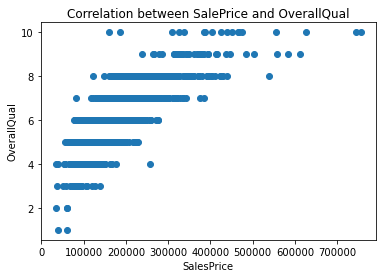

In [6]:
#Create a scatter plot x = SalePrice , y = OverallQual
plt.scatter(x=df['SalePrice'] , y=df['OverallQual'])
plt.xlabel("SalesPrice")
plt.ylabel("OverallQual")
plt.title("Correlation between SalePrice and OverallQual");

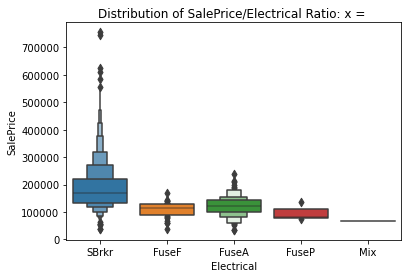

In [7]:
#show the Distribution of SalePrice/Electrical Ratio: x = Electrical , y = SalePrice
sns.boxenplot(x='Electrical' , y= 'SalePrice' , data=df)
plt.xlabel("Electrical")
plt.ylabel("SalePrice")
plt.title("Distribution of SalePrice/Electrical Ratio: x = ");

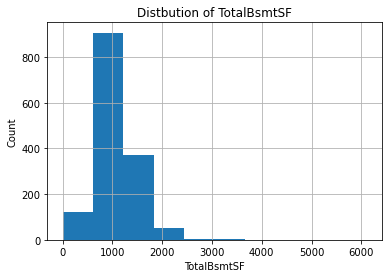

In [8]:
# Create a histogram x = TotalBsmtSF
df['TotalBsmtSF'].hist()
plt.xlabel('TotalBsmtSF')
plt.ylabel('Count')
plt.title("Distbution of TotalBsmtSF");

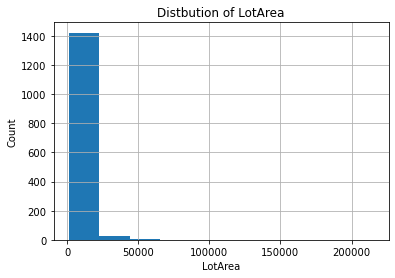

In [9]:
# create a histogram with x = LotArea
df['LotArea'].hist()
plt.xlabel('LotArea')
plt.ylabel('Count')
plt.title("Distbution of LotArea");

## Multicollinearity

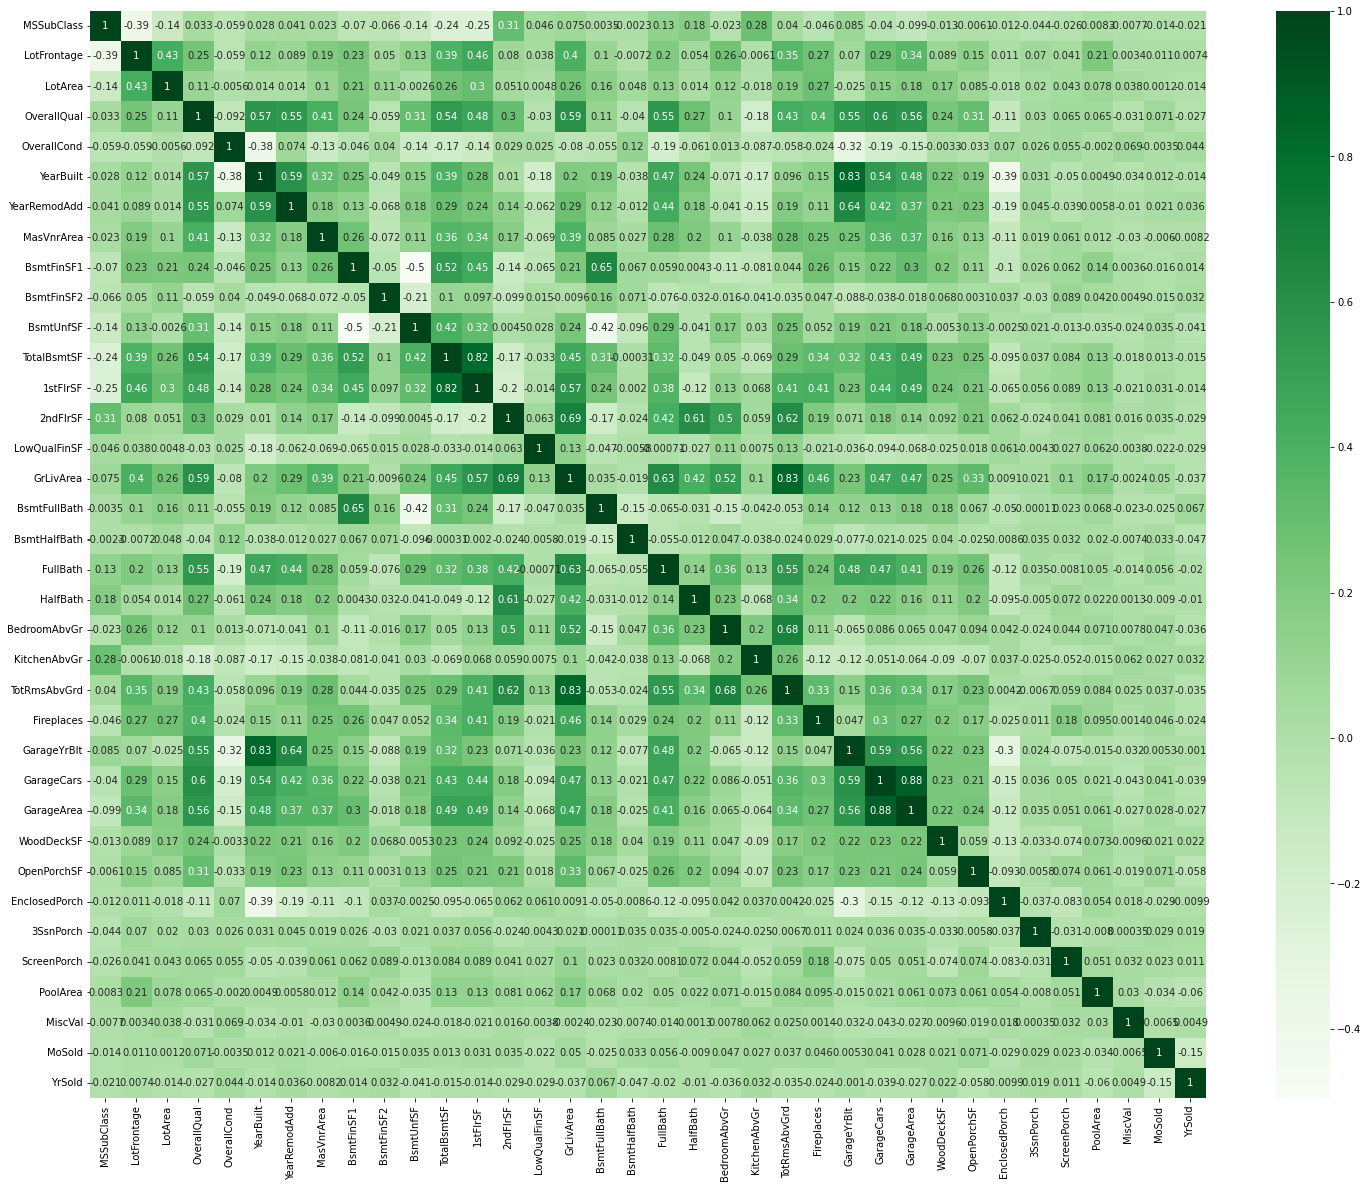

In [10]:
corr = df.drop(columns= 'SalePrice').corr()

fig , ax = plt.subplots(figsize=(25 , 20))


sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens');

In [11]:
df['GarageArea'].corr(df['GarageCars'])

df['GarageArea'].corr(df['SalePrice'])

0.623431438918362

In [12]:
df['GarageCars'].corr(df['SalePrice'])

0.6404091972583519

In [13]:
df['YearBuilt'].corr(df['GarageYrBlt'])

0.8256674841743414

In [14]:
df['YearBuilt'].corr(df['SalePrice'])

0.5228973328794971

In [15]:
df['GarageYrBlt'].corr(df['SalePrice'])

0.48636167748786086

In [16]:
df['GrLivArea'].corr(df['TotRmsAbvGrd'])

0.8254893743088424

In [17]:
df['GrLivArea'].corr(df['SalePrice'])

0.7086244776126521

In [18]:
df['TotRmsAbvGrd'].corr(df['SalePrice'])

0.5337231555820282

In [19]:
df['TotalBsmtSF'].corr(df['1stFlrSF'])

0.8195299750050336

In [20]:
df['TotalBsmtSF'].corr(df['SalePrice'])

0.6135805515591952

In [21]:
df['1stFlrSF'].corr(df['SalePrice'])

0.6058521846919146

In [22]:
df.drop(columns= ['GarageArea' ,'GarageYrBlt', 'TotRmsAbvGrd' , '1stFlrSF'] , axis=1 , inplace= True)

In [23]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


## Split

In [24]:
target = 'SalePrice'
X = df.drop(columns=[target])
y = df[target]

In [25]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1168, 71)
y_train shape: (1168,)
X_test shape: (292, 71)
y_test shape: (292,)


## Build Baseline

In [26]:
y_mean = y_train.mean()
y_pred_baseline= [y_mean] * len(y_train)
print("Mean apt price:", y_mean)

print("Baseline MAE:", mean_absolute_error(y_train,y_pred_baseline))

Mean apt price: 181441.5419520548
Baseline MAE: 56306.770899793584


## Iterate

## Linear regression / Ridge / Lasso

## 1-LinearRegression

In [27]:
Lrg = make_pipeline(

    OneHotEncoder(),
    SimpleImputer(),
    LinearRegression()

)
Lrg.fit(X_train , y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['MSZoning', 'Street', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'MasVnrType', 'ExterQual',
                                     'ExterCond', 'Foundation', 'BsmtQual',
                                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'Heating', 'HeatingQC',
                                     'CentralAir', 'Electrical', 'KitchenQual', ...])),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [28]:
mean_absolute_error(y_train , Lrg.predict(X_train))

12782.450293972068

In [29]:
reg_y_pred_train = Lrg.predict(X_train)

## Evaluate LinearRegression model

In [30]:
reg_y_pred_test = Lrg.predict(X_test)

reg_acc_train = r2_score(y_train , reg_y_pred_train)
reg_acc_test = r2_score(y_test , reg_y_pred_test)

print("Training Accuracy:", round(reg_acc_train, 4))
print("Test Accuracy:", round(reg_acc_test, 4))

Training Accuracy: 0.9341
Test Accuracy: -11428508.0951


## 2-Ridge

In [31]:
rge = make_pipeline(

    OneHotEncoder(),
    SimpleImputer(),
    Ridge()

)
rge.fit(X_train , y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['MSZoning', 'Street', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'MasVnrType', 'ExterQual',
                                     'ExterCond', 'Foundation', 'BsmtQual',
                                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'Heating', 'HeatingQC',
                                     'CentralAir', 'Electrical', 'KitchenQual', ...])),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [32]:
rge_error = mean_absolute_error(y_train , rge.predict(X_train))

print(f'the mean absolute error for ridge is {round(rge_error , 1)}')

the mean absolute error for ridge is 14002.7


## Evaluate Ridge model

In [33]:
rge_y_pred_test = rge.predict(X_test)
rge_y_pred_train = rge.predict(X_train)


rge_acc_train = r2_score(y_train , rge_y_pred_train)
rge_acc_test = r2_score(y_test , rge_y_pred_test)

print("Training Accuracy:", round(rge_acc_train, 4))
print("Test Accuracy:", round(rge_acc_test, 4))

Training Accuracy: 0.9193
Test Accuracy: 0.8891


## Lasso

In [34]:
lso = make_pipeline(

    OneHotEncoder(),
    SimpleImputer(),
    Lasso(max_iter=2000)

)
lso.fit(X_train , y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['MSZoning', 'Street', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'MasVnrType', 'ExterQual',
                                     'ExterCond', 'Foundation', 'BsmtQual',
                                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'Heating', 'HeatingQC',
                                     'CentralAir', 'Electrical', 'KitchenQual', ...])),
                ('simpleimputer', SimpleImputer()),
                ('lasso', Lasso(max_iter=2000))])

In [35]:
lso_error = mean_absolute_error(y_train , lso.predict(X_train))

print(f'the mean absolute error for ridge is {round(lso_error , 1)}')

the mean absolute error for ridge is 12793.2


## Evaluate Lasso model

In [36]:
lso_y_pred_test = lso.predict(X_test)
lso_y_pred_train = lso.predict(X_train)


lso_acc_train = r2_score(y_train , lso_y_pred_train)
lso_acc_test = r2_score(y_test , lso_y_pred_test)

print("Training Accuracy:", round(lso_acc_train, 4))
print("Test Accuracy:", round(lso_acc_test, 4))

Training Accuracy: 0.9341
Test Accuracy: 0.8993


In [37]:
models = pd.DataFrame({
    
    'Models': ['LinearRegression' , 'Ridge' , 'Lasso'],
    'Scores': [reg_acc_test, rge_acc_test , lso_acc_test]
    
})

models.sort_values(by='Scores', ascending= False)

,Models,Scores
2,Lasso,8.993331e-01
1,Ridge,8.890861e-01
0,LinearRegression,-1.142851e+07


## Save Model

In [39]:
with open("model-2" , "wb") as f:
    pickle.dump(lso , f)

## Thanks!